<a href="https://colab.research.google.com/github/Cp557/nasa_spacecraft_detection/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing for Spacecraft Detection

This notebook performs the following preprocessing steps for the spacecraft detection project:

1. **Data Loading**: Load training labels, metadata, and submission format from CSV files.
2. **Directory Setup**: Set up directories for train, validation, and test sets.
3. **Data Splitting**: Split images into training and validation sets.
4. **Image Visualization**: Display sample images with bounding boxes.
5. **Label Conversion**: Convert bounding box coordinates to YOLOv8 format.
6. **Test Set Creation**: Create a test set from a portion of the validation set.

Key functions:
- `get_bbox()`: Extract bounding box coordinates for an image.
- `display_image()`: Visualize an image with its bounding box.
- `create_yolov8_label()`: Convert bounding box coordinates to YOLOv8 format.

This preprocessing pipeline prepares the data for training a YOLOv8 model for spacecraft detection.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import gdown
import os
import random
import shutil
from matplotlib.patches import Rectangle

In [ ]:
# Load CSV files containing labels and metadata

train_labels = pd.read_csv('/content/drive/MyDrive/Coding/detection/train_labels.csv')
train_metadata = pd.read_csv('/content/drive/MyDrive/Coding/detection/train_metadata.csv')
submission_format = pd.read_csv('/content/drive/MyDrive/Coding/detection/submission_format.csv')

In [ ]:
# Set up directory paths
images_dir = '/content/drive/MyDrive/Coding/detection/data/images'  # Replace path
train_dir = os.path.join(images_dir, 'train')
val_dir = os.path.join(images_dir, 'val')
train_ratio = 0.8

# Get list of image files
image_files = [f for f in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, f))]

split_index = int(train_ratio * len(image_files))

for i, image_file in enumerate(image_files):
    src_path = os.path.join(images_dir, image_file)
    dest_dir = train_dir if i < split_index else val_dir
    shutil.move(src_path, os.path.join(dest_dir, image_file))

In [ ]:
images_dir = '/content/drive/MyDrive/Coding/detection/data/images/train'
num_files = len(os.listdir(images_dir))
print(f"Number of files in images_dir: {num_files}")

In [ ]:
images_train = os.listdir('/content/drive/MyDrive/Coding/detection/data/images/train')
images_val = os.listdir('/content/drive/MyDrive/Coding/detection/data/images/val')

In [ ]:
print(images_val[0])
'cf841a2047d9ee900fd2bf51e9bcc69a' in train_labels['image_id'].values

cf841a2047d9ee900fd2bf51e9bcc69a.png


True

In [ ]:
# Function to get bounding box coordinates for an image
def get_bbox(image_id, labels):
    """Get bbox coordinates as list from dataframe for given image id."""
    d = labels.loc[labels['image_id'] == image_id, ["xmin", "ymin", "xmax", "ymax"]].values.tolist()
    return d[0]

# Function to display an image with optional bounding box
def display_image(image_id, images_dir='/content/drive/MyDrive/Coding/detection/data/images/val', show_bbox=True, labels=train_labels):
    """Display image given image ID. Annotate with bounding box if `show_bbox` is True."""
    a = os.path.join(images_dir, f"{image_id}.png")
    img = cv2.imread(a)
    print(img.shape)
    fig, ax = plt.subplots()
    ax.imshow(np.flip(img, axis=-1))

    if show_bbox:
        xmin, ymin, xmax, ymax = get_bbox(image_id, labels)
        patch = Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, edgecolor='white', linewidth=1)
        ax.add_patch(patch)


(1024, 1280, 3)
(1024, 1280, 3)
(1024, 1280, 3)
(1024, 1280, 3)
(1024, 1280, 3)
(1024, 1280, 3)


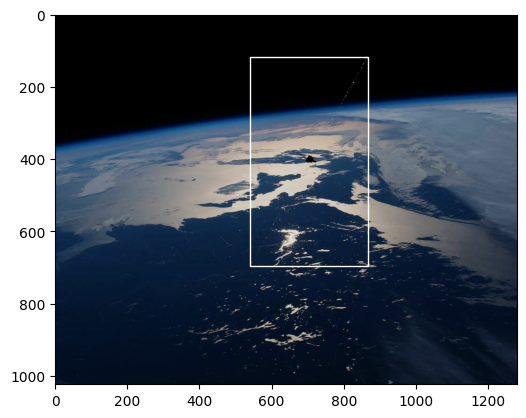

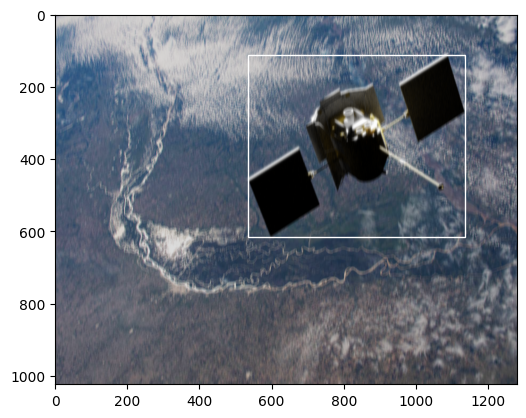

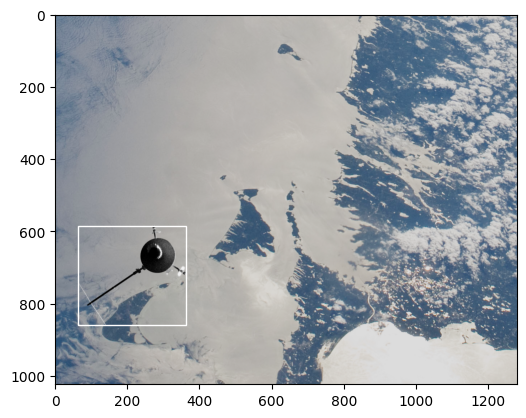

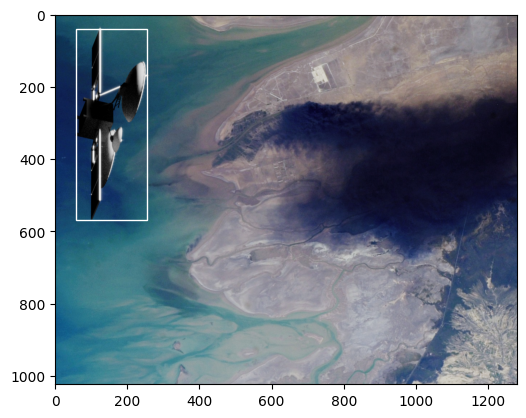

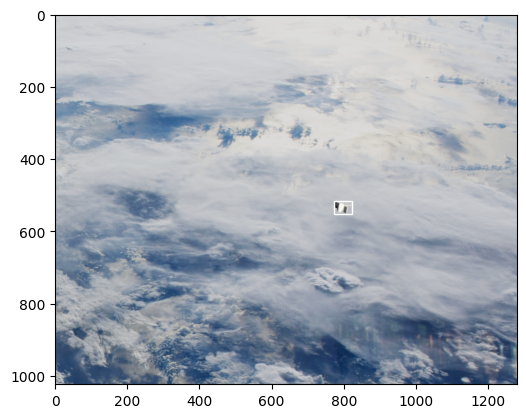

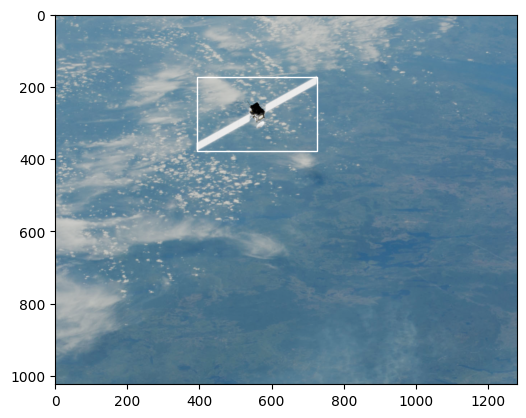

In [ ]:
# Display a few images from the validation set
j = 0
for i in images_val[99:]:
  q = i.split('.')[0]
  display_image(q, show_bbox=True)
  if j == 5:
    break
  j += 1

In [ ]:
# Function to create YOLOv8 format labels
def create_yolov8_label(image_id, image_width, image_height, xmin, ymin, xmax, ymax):
    """Creates a YOLOv8 label string from bounding box coordinates and image dimensions."""
    x_center = (xmin + xmax) / 2 / image_width
    y_center = (ymin + ymax) / 2 / image_height
    width = (xmax - xmin) / image_width
    height = (ymax - ymin) / image_height

    # Clip coordinates to image boundaries
    x_center = max(0, min(x_center, 1))
    y_center = max(0, min(y_center, 1))
    width = max(0, min(width, 1))
    height = max(0, min(height, 1))

    return f"0 {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n"

In [ ]:
# Print a few YOLOv8 labels as examples
j= 0
for index, row in train_labels.iterrows():
    if j == 5:
      break
    j += 1
    image_id = row['image_id']
    image_id_png = image_id + '.png'
    xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']

    image_width, image_height = 1280, 1024

    print(create_yolov8_label(image_id, image_width, image_height, xmin, ymin, xmax, ymax))

0 0.134766 0.481445 0.269531 0.421875

0 0.658203 0.647949 0.139844 0.120117

0 0.141797 0.446777 0.033594 0.045898

0 0.109766 0.546875 0.110156 0.050781

0 0.162109 0.094238 0.163281 0.188477



In [ ]:
# Create YOLOv8 format labels for all images
label_dir = '/content/drive/MyDrive/Coding/detection/data/labels'
for index, row in train_labels.iterrows():
    image_id = row['image_id']
    image_id_png = image_id + '.png'
    xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']

    image_width, image_height = 1280, 1024

    d = 'train'
    if image_id_png in images_train:
        d = 'train'
    elif image_id_png in images_val:
        d = 'val'
    else:
        continue

    label_str = create_yolov8_label(image_id, image_width, image_height, xmin, ymin, xmax, ymax)
    output_file = os.path.join(label_dir, d)
    output_file = os.path.join(output_file, image_id + '.txt')
    with open(output_file, 'w') as f:
        f.write(label_str)

In [ ]:
# Set up directories for creating a test set
val_images_dir = '/content/drive/MyDrive/Coding/detection/data/images/val'
val_labels_dir = '/content/drive/MyDrive/Coding/detection/data/labels/val'
test_images_dir = '/content/drive/MyDrive/Coding/detection/test/images'
test_labels_dir = '/content/drive/MyDrive/Coding/detection/test/labels'
# Get list of image files
image_files = [f for f in os.listdir(val_images_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Randomly select half of the images
num_test_images = len(image_files) // 2
test_images = random.sample(image_files, num_test_images)


# Move selected images and their corresponding labels to test folders
for image_file in test_images:
    # Move image
    src_image = os.path.join(val_images_dir, image_file)
    dst_image = os.path.join(test_images_dir, image_file)
    shutil.move(src_image, dst_image)

    # Move corresponding label
    label_file = os.path.splitext(image_file)[0] + '.txt'
    src_label = os.path.join(val_labels_dir, label_file)
    dst_label = os.path.join(test_labels_dir, label_file)
    shutil.move(src_label, dst_label)